<a id="top"></a>
# Erstellung von cf-kompatiblen netcdf-Daten am Beispiel von Niederschlagsdaten der DWD Radarklimatologie

***

## Lernziele

Am Ende dieses Tutorials werden die Lernenden in der Lage sein:
- binäre Daten in Python einzulesen
- das netcdf Datenformat inklusive des Metadatenstandards "Climate and Forecast (CF)" zu erklären
- netcdf Dateien in Python zu schreiben



## Einleitung

Die Radarklimatologie des Deutschen Wetterdienstes beinhaltet Niederschlagsmessungen basierend auf Radardaten, welche an Stationsmessungen angeeicht wurden. Sie bietet einen kontinuierliche Erfassung von Niederschlägen in Raum und Zeit mit einer räumlichen Auflösung von 1 km * 1 km und einer zeitlichen Auflösung von 1 h (RW-Produkt) bzw. 5 min (YW-Produkt). Der Zugang zu den Daten sowie weitere Informationen ist hier zu finden DOI:_10.5676/DWD/RADKLIM_RW_V2017.002_

Die Daten liegen in einem Binärformat vor und werden in diesem Tutorial in das netcdf-Format umgewandelt. 


## Libraries
Die folgenden Python Libraries werden benötigt
- numpy
- xarray
- pandas
- matplotlib
- datetime

In [1]:
import datetime as dt
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

## 1. Daten herunterladen

Wir beginnen mit dem Herunterladen der Binärdaten vom opendata-Server des Deutschen Wetterdienstes.  

In [2]:
!mkdir ./data
!wget https://opendata.dwd.de/climate_environment/CDC/grids_germany/hourly/radolan/reproc/2017_002/bin/2001/RW2017.002_200101.tar.gz

mkdir: das Verzeichnis „./data“ kann nicht angelegt werden: Die Datei existiert bereits
--2023-07-14 14:36:32--  https://opendata.dwd.de/climate_environment/CDC/grids_germany/hourly/radolan/reproc/2017_002/bin/2001/RW2017.002_200101.tar.gz
Auflösen des Hostnamens opendata.dwd.de (opendata.dwd.de)… 141.38.2.22, 141.38.2.26
Verbindungsaufbau zu opendata.dwd.de (opendata.dwd.de)|141.38.2.22|:443 … verbunden.
HTTP-Anforderung gesendet, auf Antwort wird gewartet … 200 OK
Länge: 26337160 (25M) [application/octet-stream]
Wird in »RW2017.002_200101.tar.gz.10« gespeichert.

RW2017.002_200101.t 100%[===================>]  25,12M  60,5MB/s    in 0,4s    

2023-07-14 14:36:32 (60,5 MB/s) - »RW2017.002_200101.tar.gz.10« gespeichert [26337160/26337160]



## 2. Dateien entpacken

Die Daten sind abgespeichert als monatliche tar-archive. Durch das Entpacken werden stündliche Dateien mit den Namen raa01-rw2017.002_10000-************-dwd---bin gespeichert, wobei '*' als Platzhalter für das Datum dient. 

In [3]:
!tar -xvf RW2017.002_200101.tar.gz -C data
!ls -l data/

raa01-rw2017.002_10000-0101312250-dwd---bin
raa01-rw2017.002_10000-0101312350-dwd---bin
raa01-rw2017.002_10000-0101312150-dwd---bin
raa01-rw2017.002_10000-0101312050-dwd---bin
raa01-rw2017.002_10000-0101311950-dwd---bin
raa01-rw2017.002_10000-0101311850-dwd---bin
raa01-rw2017.002_10000-0101311750-dwd---bin
raa01-rw2017.002_10000-0101311650-dwd---bin
raa01-rw2017.002_10000-0101311550-dwd---bin
raa01-rw2017.002_10000-0101311450-dwd---bin
raa01-rw2017.002_10000-0101311350-dwd---bin
raa01-rw2017.002_10000-0101311250-dwd---bin
raa01-rw2017.002_10000-0101311150-dwd---bin
raa01-rw2017.002_10000-0101311050-dwd---bin
raa01-rw2017.002_10000-0101310950-dwd---bin
raa01-rw2017.002_10000-0101310750-dwd---bin
raa01-rw2017.002_10000-0101310850-dwd---bin
raa01-rw2017.002_10000-0101310450-dwd---bin
raa01-rw2017.002_10000-0101310650-dwd---bin
raa01-rw2017.002_10000-0101310550-dwd---bin
raa01-rw2017.002_10000-0101310350-dwd---bin
raa01-rw2017.002_10000-0101310250-dwd---bin
raa01-rw2017.002_10000-010131015

raa01-rw2017.002_10000-0101240450-dwd---bin
raa01-rw2017.002_10000-0101240250-dwd---bin
raa01-rw2017.002_10000-0101240350-dwd---bin
raa01-rw2017.002_10000-0101240150-dwd---bin
raa01-rw2017.002_10000-0101240050-dwd---bin
raa01-rw2017.002_10000-0101232350-dwd---bin
raa01-rw2017.002_10000-0101232250-dwd---bin
raa01-rw2017.002_10000-0101231950-dwd---bin
raa01-rw2017.002_10000-0101231850-dwd---bin
raa01-rw2017.002_10000-0101232150-dwd---bin
raa01-rw2017.002_10000-0101232050-dwd---bin
raa01-rw2017.002_10000-0101231750-dwd---bin
raa01-rw2017.002_10000-0101231650-dwd---bin
raa01-rw2017.002_10000-0101231550-dwd---bin
raa01-rw2017.002_10000-0101231450-dwd---bin
raa01-rw2017.002_10000-0101231350-dwd---bin
raa01-rw2017.002_10000-0101231150-dwd---bin
raa01-rw2017.002_10000-0101231250-dwd---bin
raa01-rw2017.002_10000-0101231050-dwd---bin
raa01-rw2017.002_10000-0101230950-dwd---bin
raa01-rw2017.002_10000-0101230850-dwd---bin
raa01-rw2017.002_10000-0101230750-dwd---bin
raa01-rw2017.002_10000-010123065

raa01-rw2017.002_10000-0101160850-dwd---bin
raa01-rw2017.002_10000-0101161050-dwd---bin
raa01-rw2017.002_10000-0101160750-dwd---bin
raa01-rw2017.002_10000-0101160650-dwd---bin
raa01-rw2017.002_10000-0101160550-dwd---bin
raa01-rw2017.002_10000-0101160450-dwd---bin
raa01-rw2017.002_10000-0101160350-dwd---bin
raa01-rw2017.002_10000-0101160250-dwd---bin
raa01-rw2017.002_10000-0101160150-dwd---bin
raa01-rw2017.002_10000-0101160050-dwd---bin
raa01-rw2017.002_10000-0101152350-dwd---bin
raa01-rw2017.002_10000-0101152150-dwd---bin
raa01-rw2017.002_10000-0101152250-dwd---bin
raa01-rw2017.002_10000-0101152050-dwd---bin
raa01-rw2017.002_10000-0101151950-dwd---bin
raa01-rw2017.002_10000-0101151850-dwd---bin
raa01-rw2017.002_10000-0101151750-dwd---bin
raa01-rw2017.002_10000-0101151650-dwd---bin
raa01-rw2017.002_10000-0101151350-dwd---bin
raa01-rw2017.002_10000-0101151550-dwd---bin
raa01-rw2017.002_10000-0101151450-dwd---bin
raa01-rw2017.002_10000-0101151250-dwd---bin
raa01-rw2017.002_10000-010115105

raa01-rw2017.002_10000-0101082050-dwd---bin
raa01-rw2017.002_10000-0101081950-dwd---bin
raa01-rw2017.002_10000-0101081850-dwd---bin
raa01-rw2017.002_10000-0101081750-dwd---bin
raa01-rw2017.002_10000-0101081650-dwd---bin
raa01-rw2017.002_10000-0101081550-dwd---bin
raa01-rw2017.002_10000-0101081450-dwd---bin
raa01-rw2017.002_10000-0101081350-dwd---bin
raa01-rw2017.002_10000-0101081250-dwd---bin
raa01-rw2017.002_10000-0101081150-dwd---bin
raa01-rw2017.002_10000-0101081050-dwd---bin
raa01-rw2017.002_10000-0101080850-dwd---bin
raa01-rw2017.002_10000-0101080950-dwd---bin
raa01-rw2017.002_10000-0101080750-dwd---bin
raa01-rw2017.002_10000-0101080650-dwd---bin
raa01-rw2017.002_10000-0101080550-dwd---bin
raa01-rw2017.002_10000-0101080450-dwd---bin
raa01-rw2017.002_10000-0101080350-dwd---bin
raa01-rw2017.002_10000-0101080250-dwd---bin
raa01-rw2017.002_10000-0101080150-dwd---bin
raa01-rw2017.002_10000-0101080050-dwd---bin
raa01-rw2017.002_10000-0101072350-dwd---bin
raa01-rw2017.002_10000-010107225

## 3. Daten einlesen

Die Daten sind im sogenannten RADKLIM-Kompositformat abgespeichert, das heißt jede Datei besteht aus einem ASCII-Teil, welcher Metadaten enthält und einem Binär-Teil, welcher die eigentlichen Daten enthält. Das Kompositformat wird detailliert im folgenden Dokument beschrieben: https://www.dwd.de/DE/leistungen/radarklimatologie/radklim_kompositformat_1_0.pdf

### 3.1. ASCII-Teil

Aus dem ASCII-Teil der Datei `raa01-rw2017.002_10000-0101010050-dwd---bin` werden die Metadaten ausgelesen und in der Variable `ascii_header` gespeichert. 

In [166]:
file_name="./data/raa01-rw2017.002_10000-0101010050-dwd---bin"
ascii_header=''    

#Opening and reading binary file
file = open(file_name, 'rb')
while True:
    char = file.read(1)
    if char == b'\x03':
       break
    ascii_header += str(char.decode())  

In [167]:
ascii_header

'RW010050100000101BY1980160VS 3SW   2.18.3PR E-01INT  60U0GP1100x 900MF 00000001VR2017.002MS 65<ham,ros,emd,han,umd,bln,ess,fld,drs,neu,nhb,fra,eis,tur,muc,fbg>'

Aus dem Header werden nun die Metadaten-Elemente `Zeitpunkt (datetime)` sowie `Felddimensionen (nrow, ncol)` extrahiert und im Dictionary `attrs` gespeichert. Zusätzlich werden die Elemente `datasize`und `precision` gesetzt:

In [168]:
attrs = {}

attrs["datetime"] = dt.datetime.strptime(ascii_header[2:8] + ascii_header[13:17] + "00","%d%H%M%m%y%S")
attrs["nrow"] = int(ascii_header[59:63])
attrs["ncol"] = int(ascii_header[65:68])

attrs['datasize'] = 1980000   
attrs["precision"] = 0.1

In [169]:
attrs

{'datetime': datetime.datetime(2001, 1, 1, 0, 50),
 'nrow': 1100,
 'ncol': 900,
 'datasize': 1980000,
 'precision': 0.1}

### 3.2. Daten-Teil

In [170]:
NODATA = -9999

binarr = file.read(attrs['datasize'] )
file.close()

arr = np.frombuffer(binarr, np.uint16).astype(np.uint16)

nodata = np.where(arr >1000)[0]
       
# Scaling Faktor zum Umrechnen der Daten in mm/h
arr = arr * attrs['precision']
# Fehlwerte setzen
arr[nodata] = NODATA

# Umwandeln von 1-dimensionalem Array in 2-dimensionales Array
arr = arr.reshape((attrs['nrow'], attrs['ncol']))

#Umwandel in Numpy 
arr_numpy=np.array(arr,ndmin=3)

# 4. Daten verarbeiten

In diesem Abschnitt wird das eben gespeicherte NumpyArray `arr_numpy` in ein XArray Objekt umgewandelt und als netcdf Datei gespeichert. Hierzu müssen die Gitterkoordinaten berechnet werden. 

In [173]:
lats=list(range(1,1101))
lons=list(range(1,901))
times=pd.to_datetime(attrs["datetime"])
precipitation=np.array(arr,ndmin=3)

time_pd=pd.date_range(times,periods=1)


arr_xarray = xr.DataArray(precipitation,dims=("time","y","x"),coords={"time":time_pd,"x":lons,"y":lats}
#'times': ('time', times)
)

ds_masked = arr_xarray.where(arr_xarray != -9999.)  

ds_masked.to_netcdf("./arr_xarray.nc")

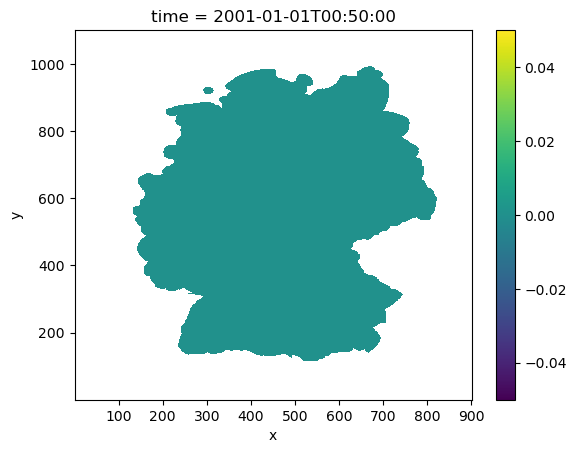

In [174]:
ds_masked.plot()

## Überprüfung der netcdf-Datei auf Konformität mit dem cf-Standard

Um zu überprüfen, ob die erstellte netcdf-Datei konform zum CF-Standard ist, kann der sogenannte "CF-Checker" benutzt werden: https://github.com/cedadev/cf-checker

Dieser lässt sich beispielsweise mit dem Paketmanager conda wie folgt intallieren:

```
conda create -n cfchecker -c conda-forge cfchecker # create new env OR
conda install cfchecker -c conda-forge             # install on existing env
```

Anschließend kann er wie folgt ausgeführt werden:

In [175]:
!cfchecks arr_xarray.nc

CHECKING NetCDF FILE: arr_xarray.nc
Using CF Checker Version 4.1.0
Checking against CF Version CF-1.8
Using Standard Name Table Version 82 (2023-07-06T13:17:07Z)
Using Area Type Table Version 11 (06 July 2023)
Using Standardized Region Name Table Version 4 (18 December 2018)

WARN: (2.6.1): No 'Conventions' attribute present

------------------
Checking variable: time
------------------
WARN: (3): No standard_name or long_name attribute specified

------------------
Checking variable: x
------------------
WARN: (3): No standard_name or long_name attribute specified
WARN: (3.1): units attribute should be present

------------------
Checking variable: y
------------------
WARN: (3): No standard_name or long_name attribute specified
WARN: (3.1): units attribute should be present

------------------
Checking variable: __xarray_dataarray_variable__
------------------
WARN: (2.3): Variable names should begin with a letter and be composed of letters, digits and underscores
WARN: (3): No stand

## Weitere Materialien

- https://unidata.github.io/python-training/workshop/CF%20Conventions/netcdf-and-cf-the-basics/
- CF-Conventions - Übersicht: https://cfconventions.org/
- CF-Conventions - aktuelle Version: http://cfconventions.org/cf-conventions/cf-conventions.html